In [25]:
from scipy.stats import genextreme as gev
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as spio

# Generalized Extreme Value Model for Surface Displacement Distribution 

If you find this work useful, please cite:

Thingbaijam K.K.S. (2022) Generalized Extreme Value Model for Surface Displacement Distribution.

In [26]:
# the data is in .mat format. See mat.py in eqsrcpy for a more elegant way to read .mat files 
data = spio.loadmat('data/surfaceprofiles_srcmod2016.mat', struct_as_record=False, squeeze_me=True)
slips = data["slips"]
normx = data["normx"]
nprofiles = len(slips)
# note that these profile include reflections - it is double counted 
ngridpoints = len(slips[0])
# slips = np.array(slips)# we want to slice

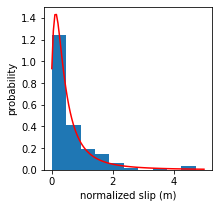

In [27]:
par_shp = []
par_loc = []
par_scl = []

# get distribution for a point

i=0;
plt.figure(figsize=(3, 3))
xi = normx[i]
si = slips[:,i]
plt.hist(si, density=True);
fit = gev.fit(si)
# fit returns MLE estimates of the shape, location, scale parameters
# Also, note that the results from scipy.stats and MATLAB differs in the sign of shape parameter    

x = np.linspace(0.0,5,100) 
y = gev.pdf(x, fit[0], loc=fit[1], scale=fit[2])
plt.plot(x, y, 'r-');
plt.xlabel('normalized slip (m)');
plt.ylabel('probability');

### References

SciPy User Guide, https://docs.scipy.org/doc/scipy/reference/tutorial/stats/continuous_genextreme.html, last accessed: January 20, 2022. 

Thingbaijam  KKS,  Van  Dissen  RJ,  Shaw  BE,  Gerstenberger  MC. 2022. Average coseismic slip profiles. Lower Hutt (NZ):  GNS Science.33p. (GNS Science report; 2021/24). doi:10.21420/S6ED-JN06

Mai PM, Thingbaijam KKS. (2014) SRCMOD: An online database of finite‐fault rupture models. Seismological Research Letters. 85(6):1348-57.http://equake-rc.info/srcmod/

